In [75]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import helper functions from Exploration_Preprocessing_helpers

In [96]:
from Exploration_plots import *
from preprocessing import *

 ## Data Exploration:

## Load the training data into feature matrix, class labels, and event ids:

In [97]:
from proj1_helpers import *
DATA_TRAIN_PATH = "train.csv"  
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

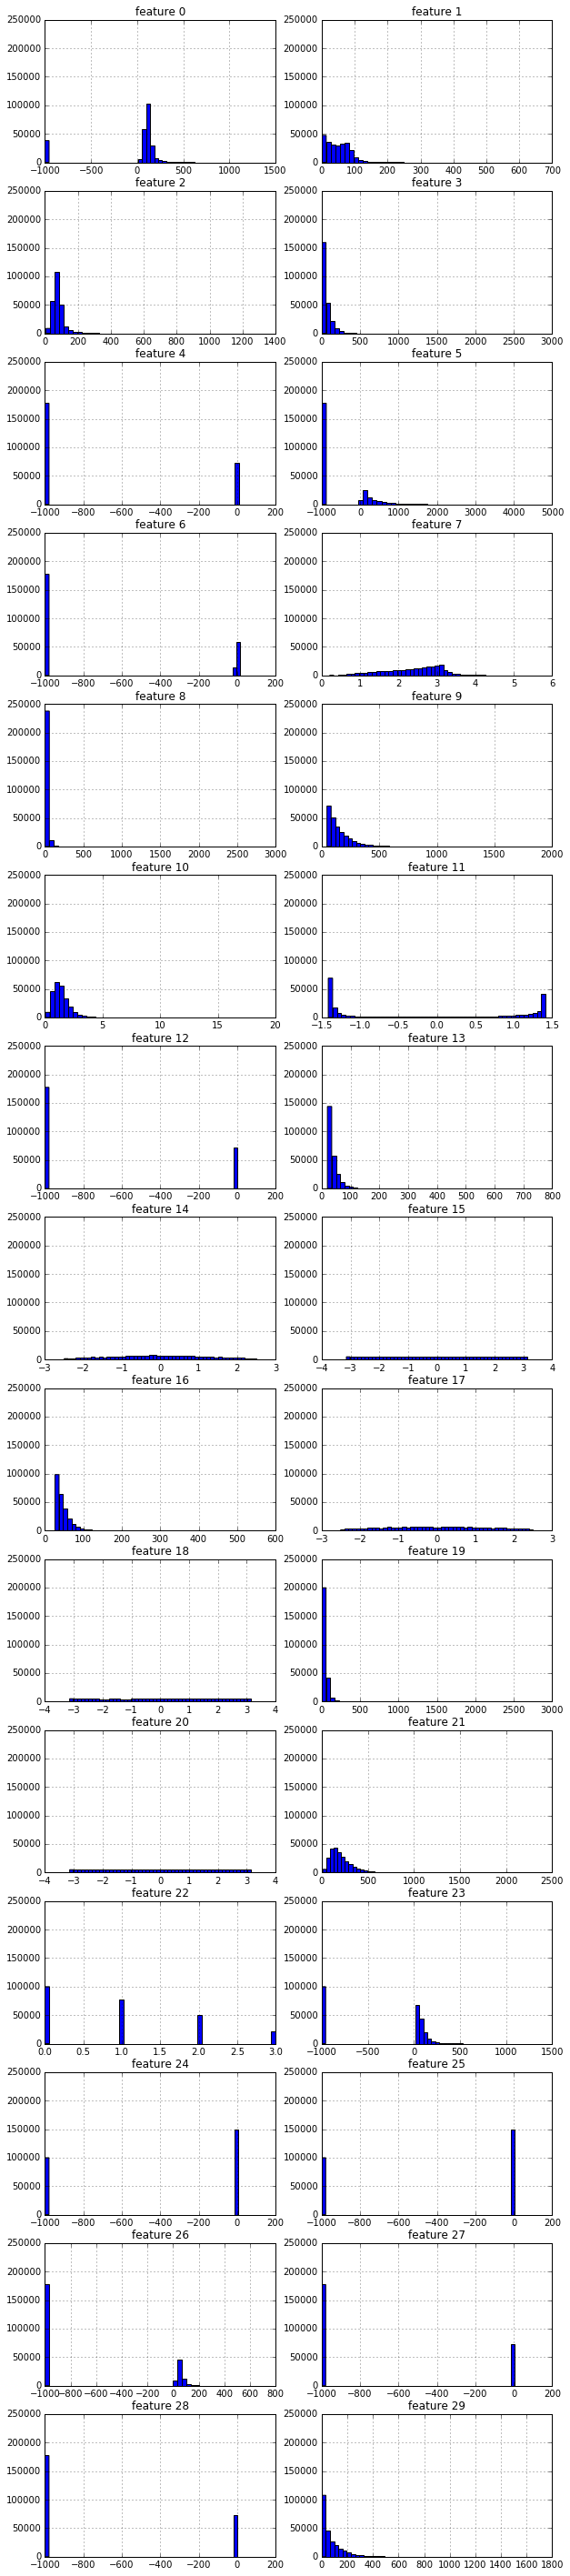

In [78]:
##Observe Feature Distribution:
feature_plot(tX)
plt.savefig("Figures/Featureplot0")

Observations: 
    Multiple features have values that were replaced by -999 and will require preprocessing
    Feature 23 is discrete and will require special treatment
    Feature 12 might require special treatment
    Features 15,16,18,19 appear uniform and might need some special treatment
    All the other features follow either an exponential or normal. or uniform distribution
    

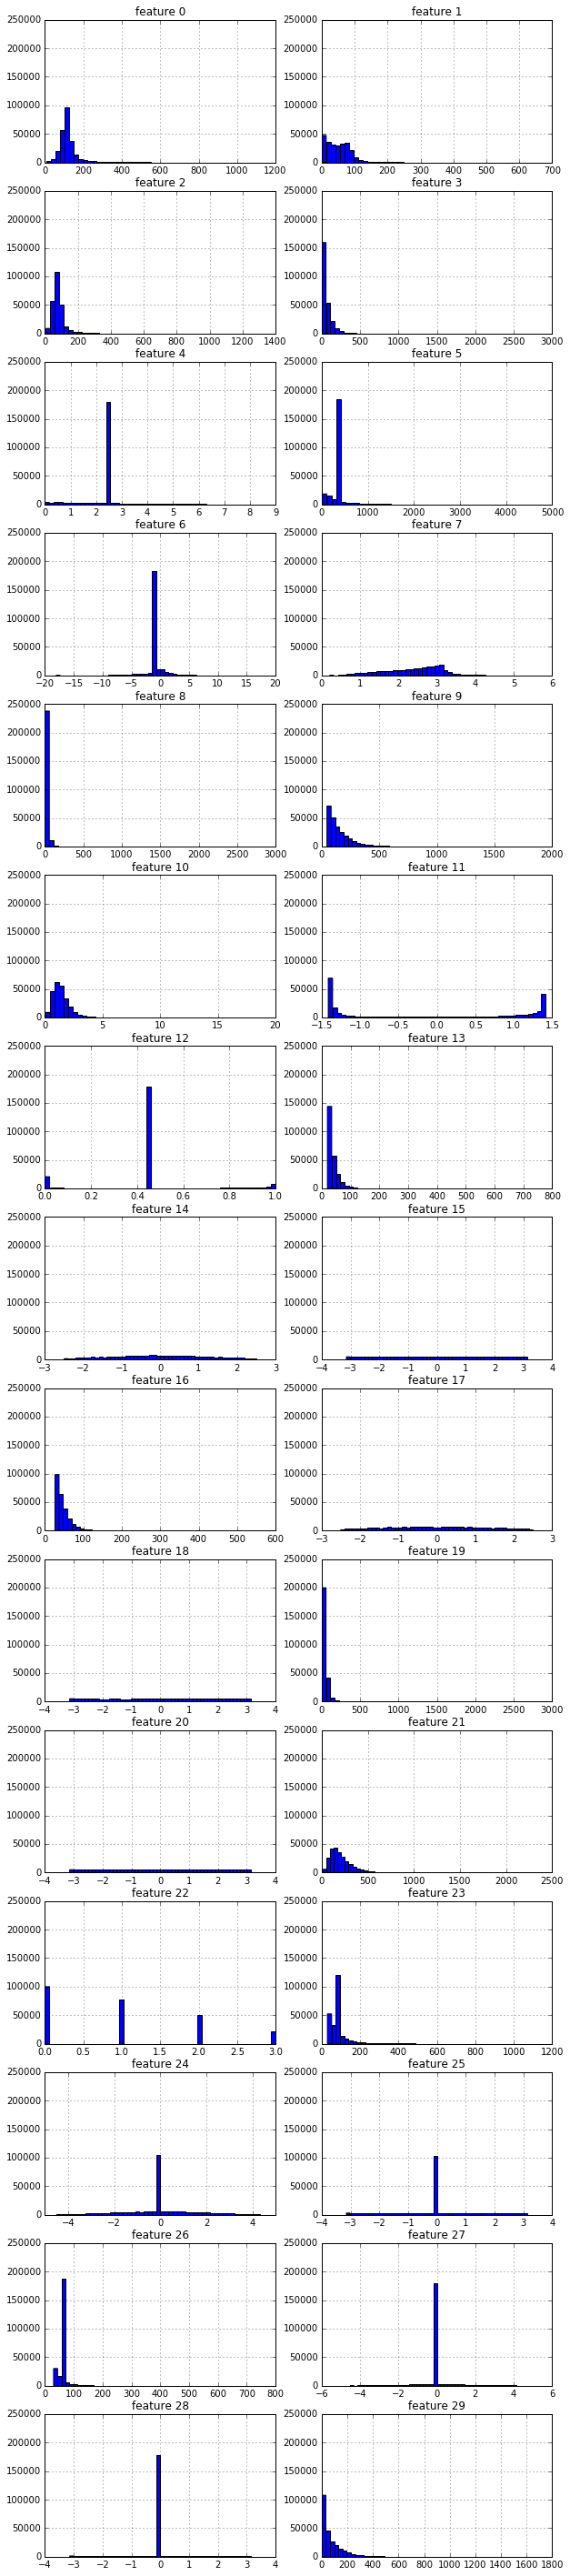

In [79]:
feature_plot(mean_replace(tX))
plt.savefig("Figures/Featureplot1")

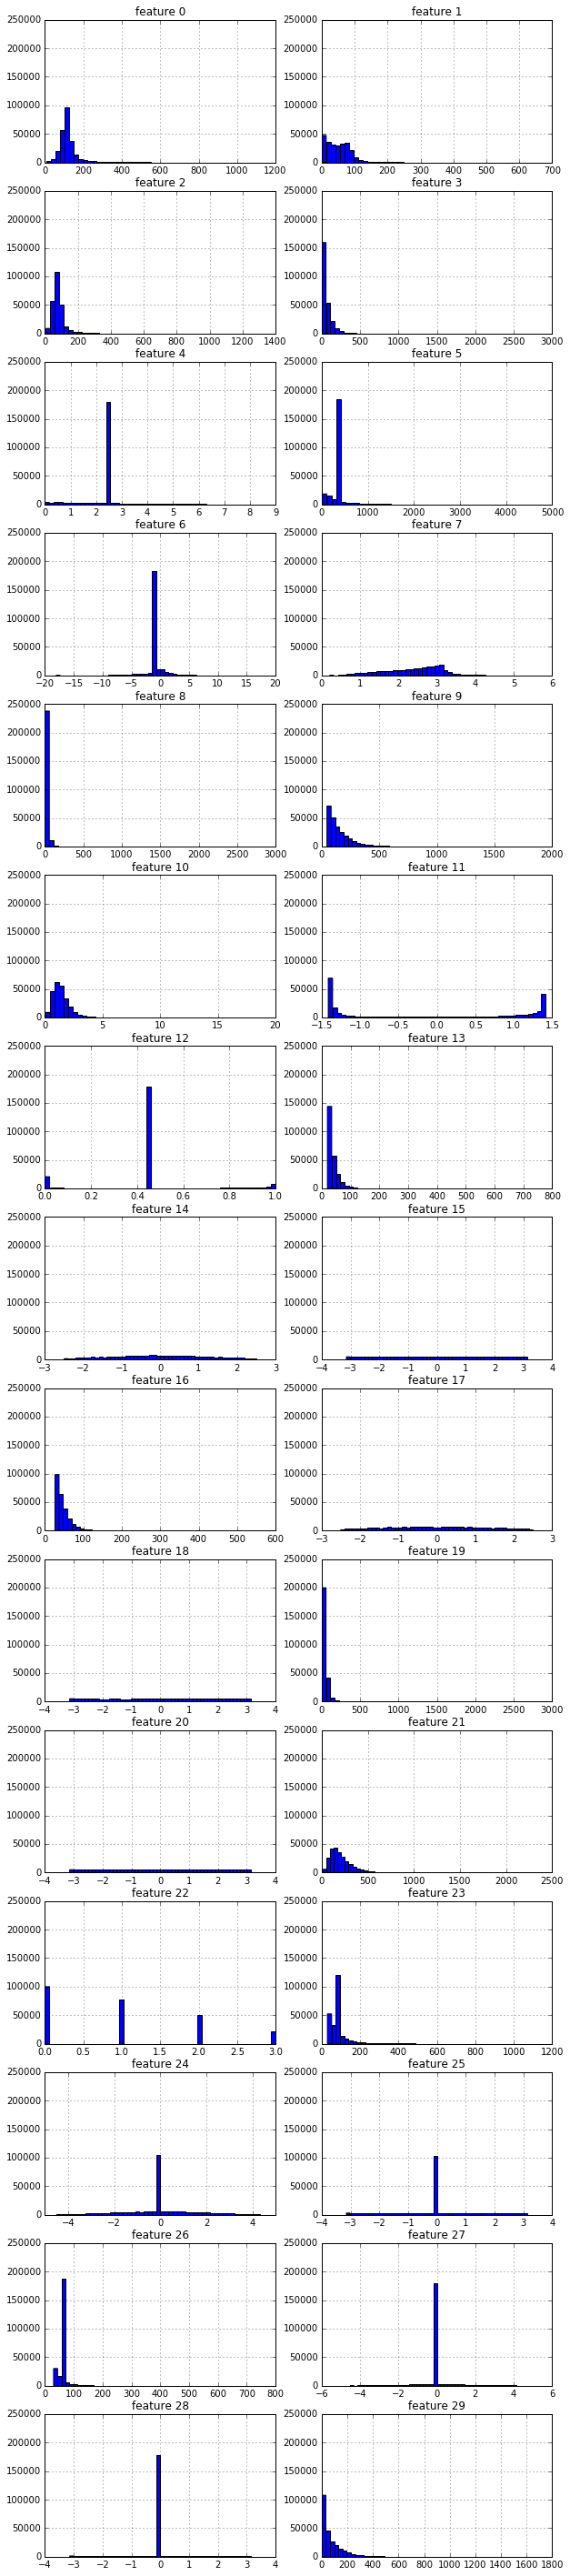

In [80]:
feature_plot(median_replace(tX))
plt.savefig("Figures/Featureplot2")

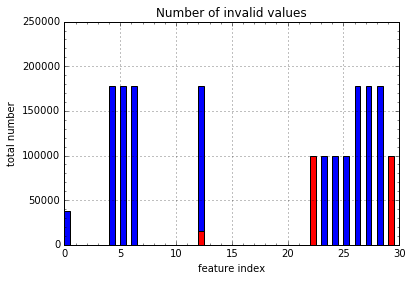

In [111]:
## Determine the number of invalid entries per feature
plot_number_invalid_values(tX)
#plot number of 0 points
plot_number_zeros(tX)
plt.savefig("Figures/invalid")

Observations: 
    Feature 0 has a unique number of invalid entries
    Features 4,5,6,12 have equal number of invalid entries for the same data points
    Features 23,245,25 have equal number of invalid entries for the same data points
    Features 26,27,28 have equal number of invalid entries for the same data points
==> Might be useful to replace one of the feature columns by a binary classification of invalid versus valid entries


In [102]:
from proj1_helpers import *
DATA_TEST_PATH = "test.csv" # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

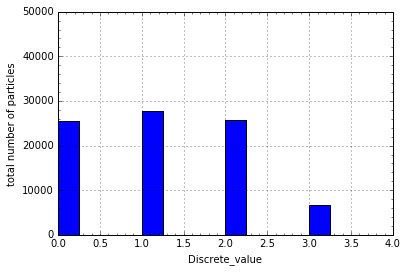

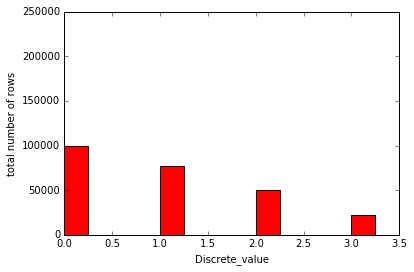

[ 25492.  27710.  25734.   6731.] [ 99913.  77544.  50379.  22164.]
[ 0.25514197  0.35734551  0.51080807  0.30369067]
[ 0.399652  0.310176  0.201516  0.088656]


In [116]:
#observe relation between discrete column and classification
from Exploration_Preprocessing_helpers import *
observe=plot_number_particle(y,tX[:,22])
print(observe[0],observe[1])
print(observe[0]/observe[1])
print(observe[1]/250000)

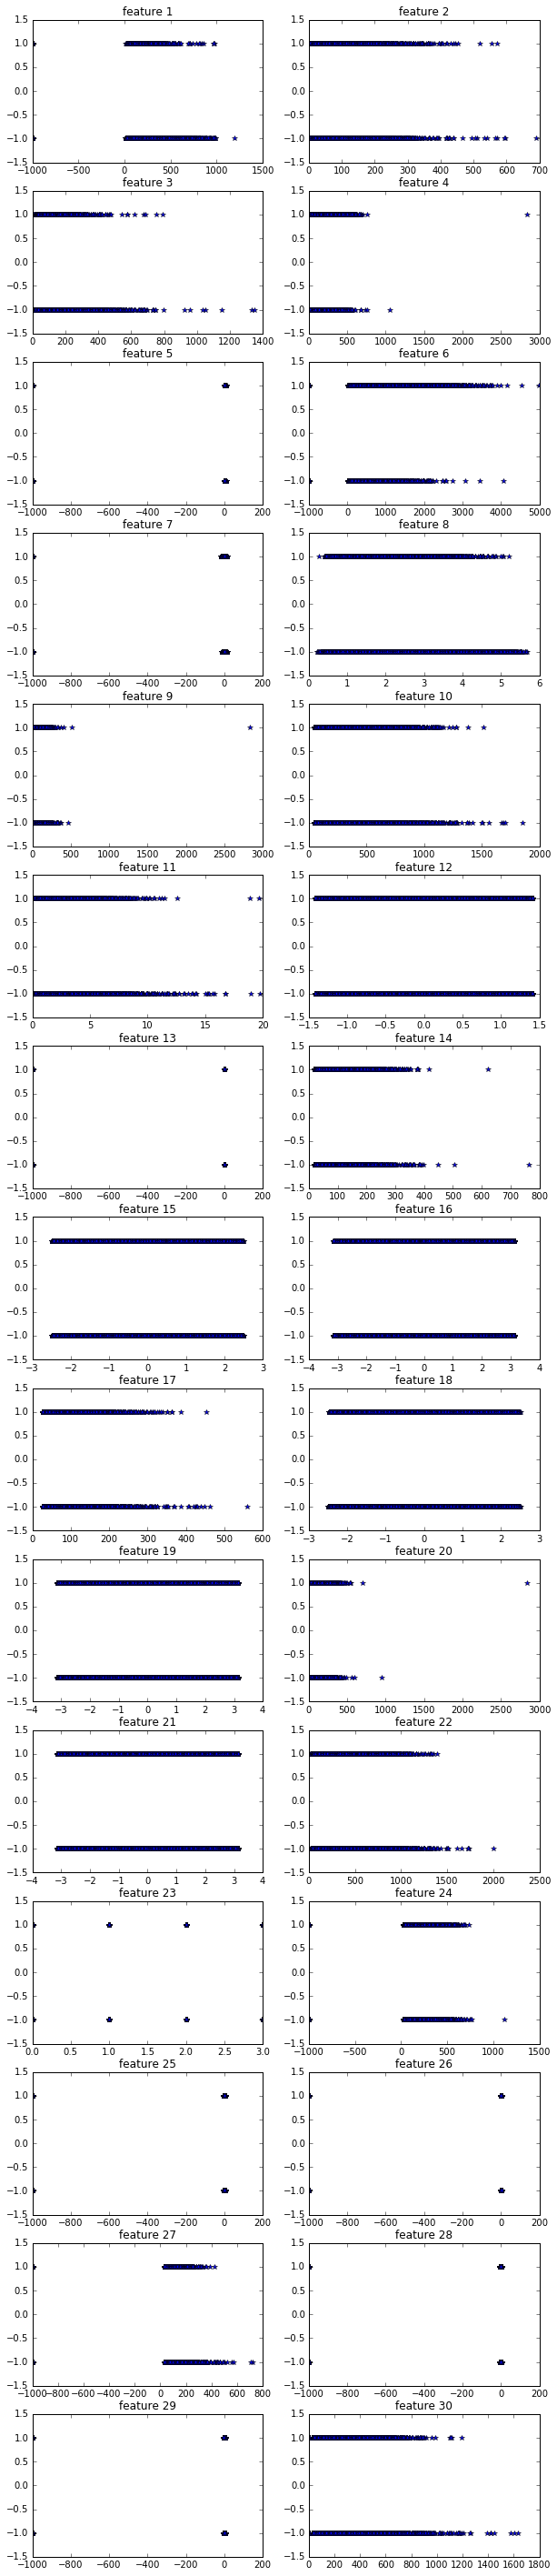

In [109]:
##Dertermine whether there is a clear classifier
observe_feature_classification(tX,y)

Observation:
    There appears to be no clear classifier feature 

In [ ]:
#Investigate the correlation between each feature and the output vector y

correlation_plot_all(tX,'Correlations')
plt.savefig("Figures/correlations_all")

Observations:
    Columns 14,15,17, and 18 display no linear correlation with the output.
==> Consider different processing for these features

In [ ]:
#Investigate correlations of features with each other to determine which features to eliminate
#Execting some correlations for features 0-12 since they are derived from features 13-29

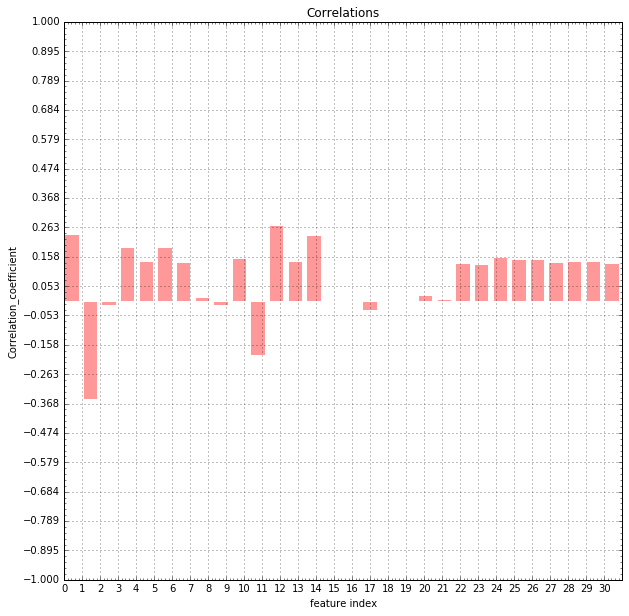

In [101]:
correlation_plot(tX,y,'Correlations')
plt.savefig("Figures/input_output_corr")

Observations:
    Features with a high number of invalid values (-999) in general appear to be most correlated
==> Apply this test after preprocessing the data.

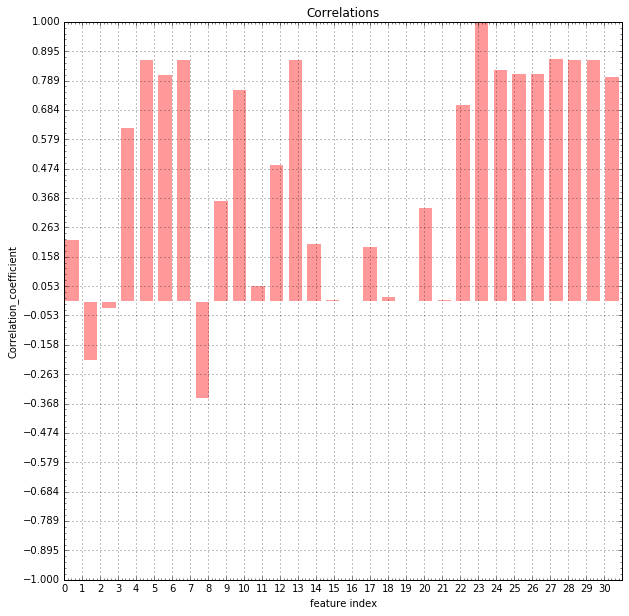

In [100]:
correlation_plot(tX,tX[:,22],'Correlations')